## Multiclass Classification

when you have more than two classes as an option, it's known as **Multiclass - classification**.

* This means if you have 3 different classes, it's multiclass classification
* it also means if you have 100 different classes, it's multi-class classification

### Classification of `Fashion Mnist dataset`

In [1]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.5 MB/s eta 0:00:00


In [19]:
import tensorflow as tf
import numpy as np
import pandas as pd
import wandb as wb
from tensorflow.keras.datasets import fashion_mnist
from wandb.keras import WandbMetricsLogger

In [3]:
wb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## load the dataset

In [4]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
# Show the first training example
print(f"Training sample: \n{train_data[0]}")
print(f"Training label: \n{train_labels[0]}")

Training sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [8]:
# check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

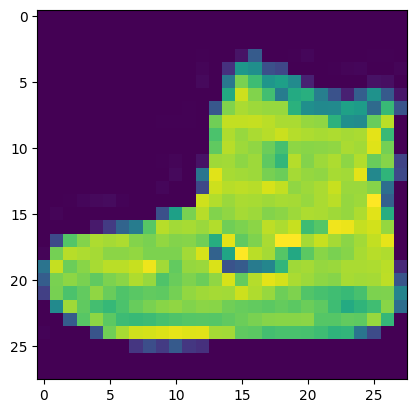

In [9]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [10]:
## Check our sample labels
train_labels[0]

9

### Labels list

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

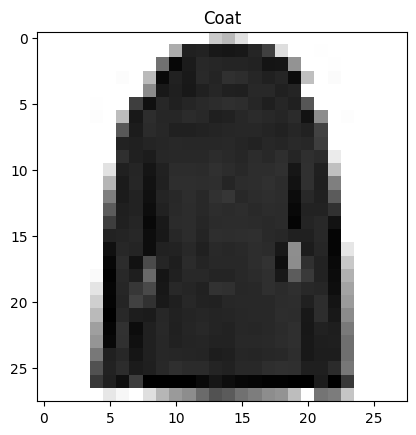

In [15]:
# Plot an example image and itslabel
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

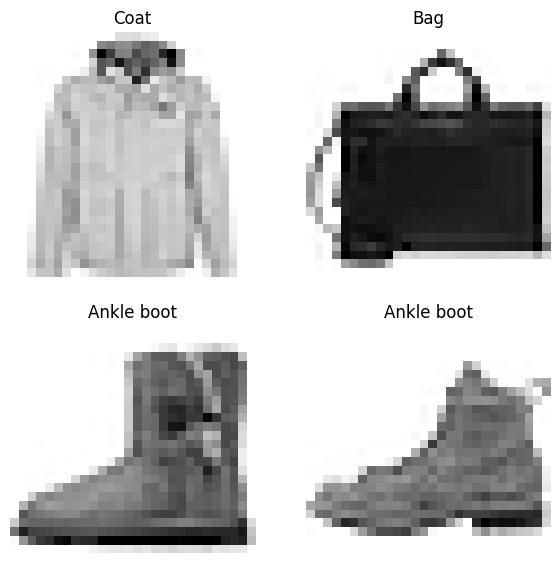

In [18]:
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = 'binary')
  plt.title(class_names[train_labels[rand_index]])
  plt.axis('off')

## Build a Multiclass classification model

For our multi-class classificatoin model, we can use a similar archicture to our binary classifier, however, we're going to have to tweak a few things:

* Input shape = 28 x 28
* Output shape = 10 (one per class)
* Loss function = Categorical crossentropy
* Output activation = `softmax`

In [25]:
tf.random.set_seed(42)

wb.init(project = "Multiclass_Classification", name = "model_1")

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = 'adam',
                metrics = ['accuracy'])

non_norm_history = model_1.fit(train_data, train_labels,
                               epochs = 10,
                               validation_data = (test_data, test_labels),
                               callbacks = [WandbMetricsLogger()]
                               )

wandb: Currently logged in as: rahulkrishlalwani. Use `wandb login --relogin` to force relogin


Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2047 - accuracy: 0.1590 - val_loss: 1.8681 - val_accuracy: 0.2729
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7119 - accuracy: 0.2991 - val_loss: 1.6337 - val_accuracy: 0.2952
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5656 - accuracy: 0.3310 - val_loss: 1.5184 - val_accuracy: 0.3398
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5306 - accuracy: 0.3498 - val_loss: 1.5104 - val_accuracy: 0.3694
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4741 - accuracy: 0.3536 - val_loss: 1.5254 - val_accuracy: 0.3283
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4767 - accuracy: 0.3595 - val_loss: 1.5256 - val_accuracy: 0.3609
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.4508 - accuracy: 0.3657 - val_loss: 1.4639 - val_accuracy:

In [26]:
wb.finish()

epoch/accuracy,▁▅▆▆▆▇▇▇██
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▃▂▂▂▂▁▁▁
epoch/val_accuracy,▁▂▄▅▃▅▅▆▇█
epoch/val_loss,█▄▃▃▃▃▂▁▁▁
epoch/accuracy,0.40787
epoch/epoch,9
epoch/learning_rate,0.001
epoch/loss,1.39081
epoch/val_accuracy,0.4324


### lets normalize the data to see how it perform on normalized data

Neural network prefer data to be scaled (or normalized)

In [29]:
train_data.min(), train_data.max()

(0, 255)

In [30]:
train_data_norm = train_data/255.0
test_data_norm = test_data/ 255.0

In [31]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [32]:
tf.random.set_seed(42)

wb.init(project = "Multiclass_Classification", name = "model_2_normalized_data")

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = 'adam',
                metrics = ['accuracy'])

norm_history = model_2.fit(train_data_norm, train_labels,
                               epochs = 10,
                               validation_data = (test_data_norm, test_labels),
                               callbacks = [WandbMetricsLogger()]
                               )

wb.finish()

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0617 - accuracy: 0.6393 - val_loss: 0.7027 - val_accuracy: 0.7545
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6358 - accuracy: 0.7750 - val_loss: 0.6558 - val_accuracy: 0.7651
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5986 - accuracy: 0.7860 - val_loss: 0.6214 - val_accuracy: 0.7803
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5782 - accuracy: 0.7919 - val_loss: 0.6202 - val_accuracy: 0.7762
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5649 - accuracy: 0.7962 - val_loss: 0.5947 - val_accuracy: 0.7862
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5514 - accuracy: 0.8026 - val_loss: 0.6016 - val_accuracy: 0.7871
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5379 - accuracy: 0.8089 - val_loss: 0.5715 - val_accuracy:

epoch/accuracy,▁▆▇▇▇▇▇███
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▂▂▂▂▁▁▁▁
epoch/val_accuracy,▁▂▄▄▅▅▆▇▇█
epoch/val_loss,█▆▅▅▄▄▃▂▂▁
epoch/accuracy,0.82413
epoch/epoch,9
epoch/learning_rate,0.001
epoch/loss,0.50306
epoch/val_accuracy,0.8133


<Axes: title={'center': 'Normalized data'}>

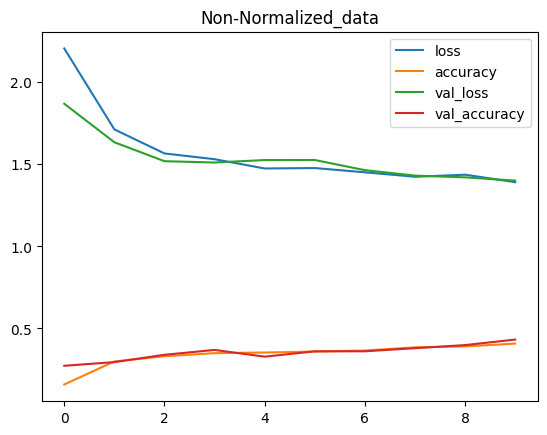

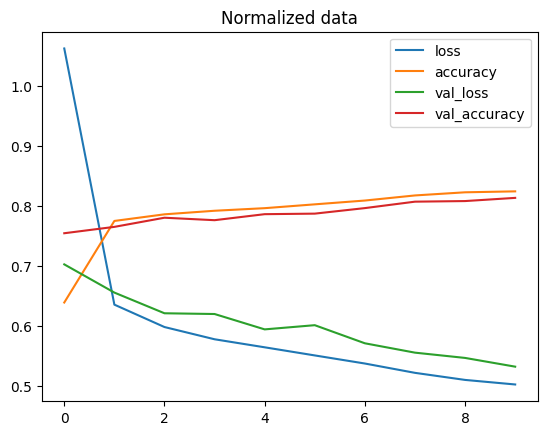

In [34]:
import pandas as pd
# Plot non normalized data loss curver
pd.DataFrame(non_norm_history.history).plot(title = "Non-Normalized_data")
pd.DataFrame(norm_history.history).plot(title = "Normalized data")

## let's find the ideal learning data

In [36]:
# set random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = 'adam',
                metrics = ['accuracy'])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_3.fit(train_data_norm,
                              train_labels,
                              validation_data = (test_data_norm, test_labels),
                              epochs = 40,
                              callbacks = [lr_schedular])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0918 - accuracy: 0.6118 - val_loss: 0.6827 - val_accuracy: 0.7640 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6143 - accuracy: 0.7860 - val_loss: 0.6256 - val_accuracy: 0.7746 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5739 - accuracy: 0.7987 - val_loss: 0.6029 - val_accuracy: 0.7893 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5541 - accuracy: 0.8058 - val_loss: 0.5649 - val_accuracy: 0.8037 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5422 - accuracy: 0.8095 - val_loss: 0.5770 - val_accuracy: 0.7924 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5283 - accuracy: 0.8159 - val_loss: 0.6037 - val_accuracy: 0.7915 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 1

Text(0.5, 1.0, 'Finding the ideal learning rate')

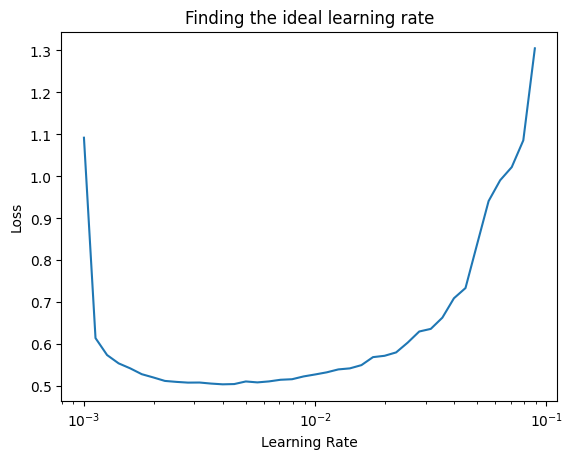

In [37]:
# Plot learning rate decay cruve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel('Loss')
plt.title("Finding the ideal learning rate")

In [39]:
# Let's refit the model with ideal learning rate

tf.random.set_seed(42)

wb.init(project = "Multiclass_Classification", name = "model_4_with_ideal_learing_rate")
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])
history_4  = model_4.fit(train_data_norm,
                         train_labels,
                         epochs = 20,
                         validation_data = (test_data_norm , test_labels),
                         callbacks = [WandbMetricsLogger()])

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2157 - accuracy: 0.5699 - val_loss: 0.8041 - val_accuracy: 0.7061
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7330 - accuracy: 0.7190 - val_loss: 0.7121 - val_accuracy: 0.7219
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6737 - accuracy: 0.7343 - val_loss: 0.6854 - val_accuracy: 0.7342
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6472 - accuracy: 0.7430 - val_loss: 0.6733 - val_accuracy: 0.7384
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6251 - accuracy: 0.7478 - val_loss: 0.6488 - val_accuracy: 0.7479
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5980 - accuracy: 0.7593 - val_loss: 0.6133 - val_accuracy: 0.7537
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5811 - accuracy: 0.7668 - val_loss: 0.6291 - val_accuracy:

In [40]:
wb.finish()

epoch/accuracy,▁▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇████
epoch/epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▂▃▃▄▄▄▅▅▅▆▆▆▆▆▇▇▇██
epoch/val_loss,█▅▅▄▄▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁
epoch/accuracy,0.82023
epoch/epoch,19
epoch/learning_rate,0.001
epoch/loss,0.5055
epoch/val_accuracy,0.8025


## Evaluating our Multi-class Classification

In [56]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_test, y_preds, classes = None,figsize = (10, 10), text_size = 15):
# Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=10)


In [52]:
y_probs = model_4.predict(test_data_norm)

y_preds =y_probs.argmax(axis = 1)
# make_confusion_matrix()
y_preds

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [53]:
confusion_matrix(test_labels,
                 y_preds)

array([[744,   1,   4, 102,  10,   0, 117,   0,  22,   0],
       [  1, 941,  12,  35,   5,   0,   4,   0,   2,   0],
       [ 12,   5, 514,  11, 256,   0, 182,   0,  20,   0],
       [ 35,  18,  18, 813,  50,   0,  56,   1,   9,   0],
       [  0,   1,  62,  18, 820,   0,  98,   0,   1,   0],
       [  0,   0,   1,   1,   0, 920,   0,  37,   7,  34],
       [170,   1,  71,  54, 175,   0, 492,   1,  36,   0],
       [  0,   0,   0,   0,   0,  48,   0, 917,   1,  34],
       [  1,   0,   3,  10,   6,   3,  33,   3, 939,   2],
       [  0,   0,   0,   0,   0,  14,   0,  55,   6, 925]])

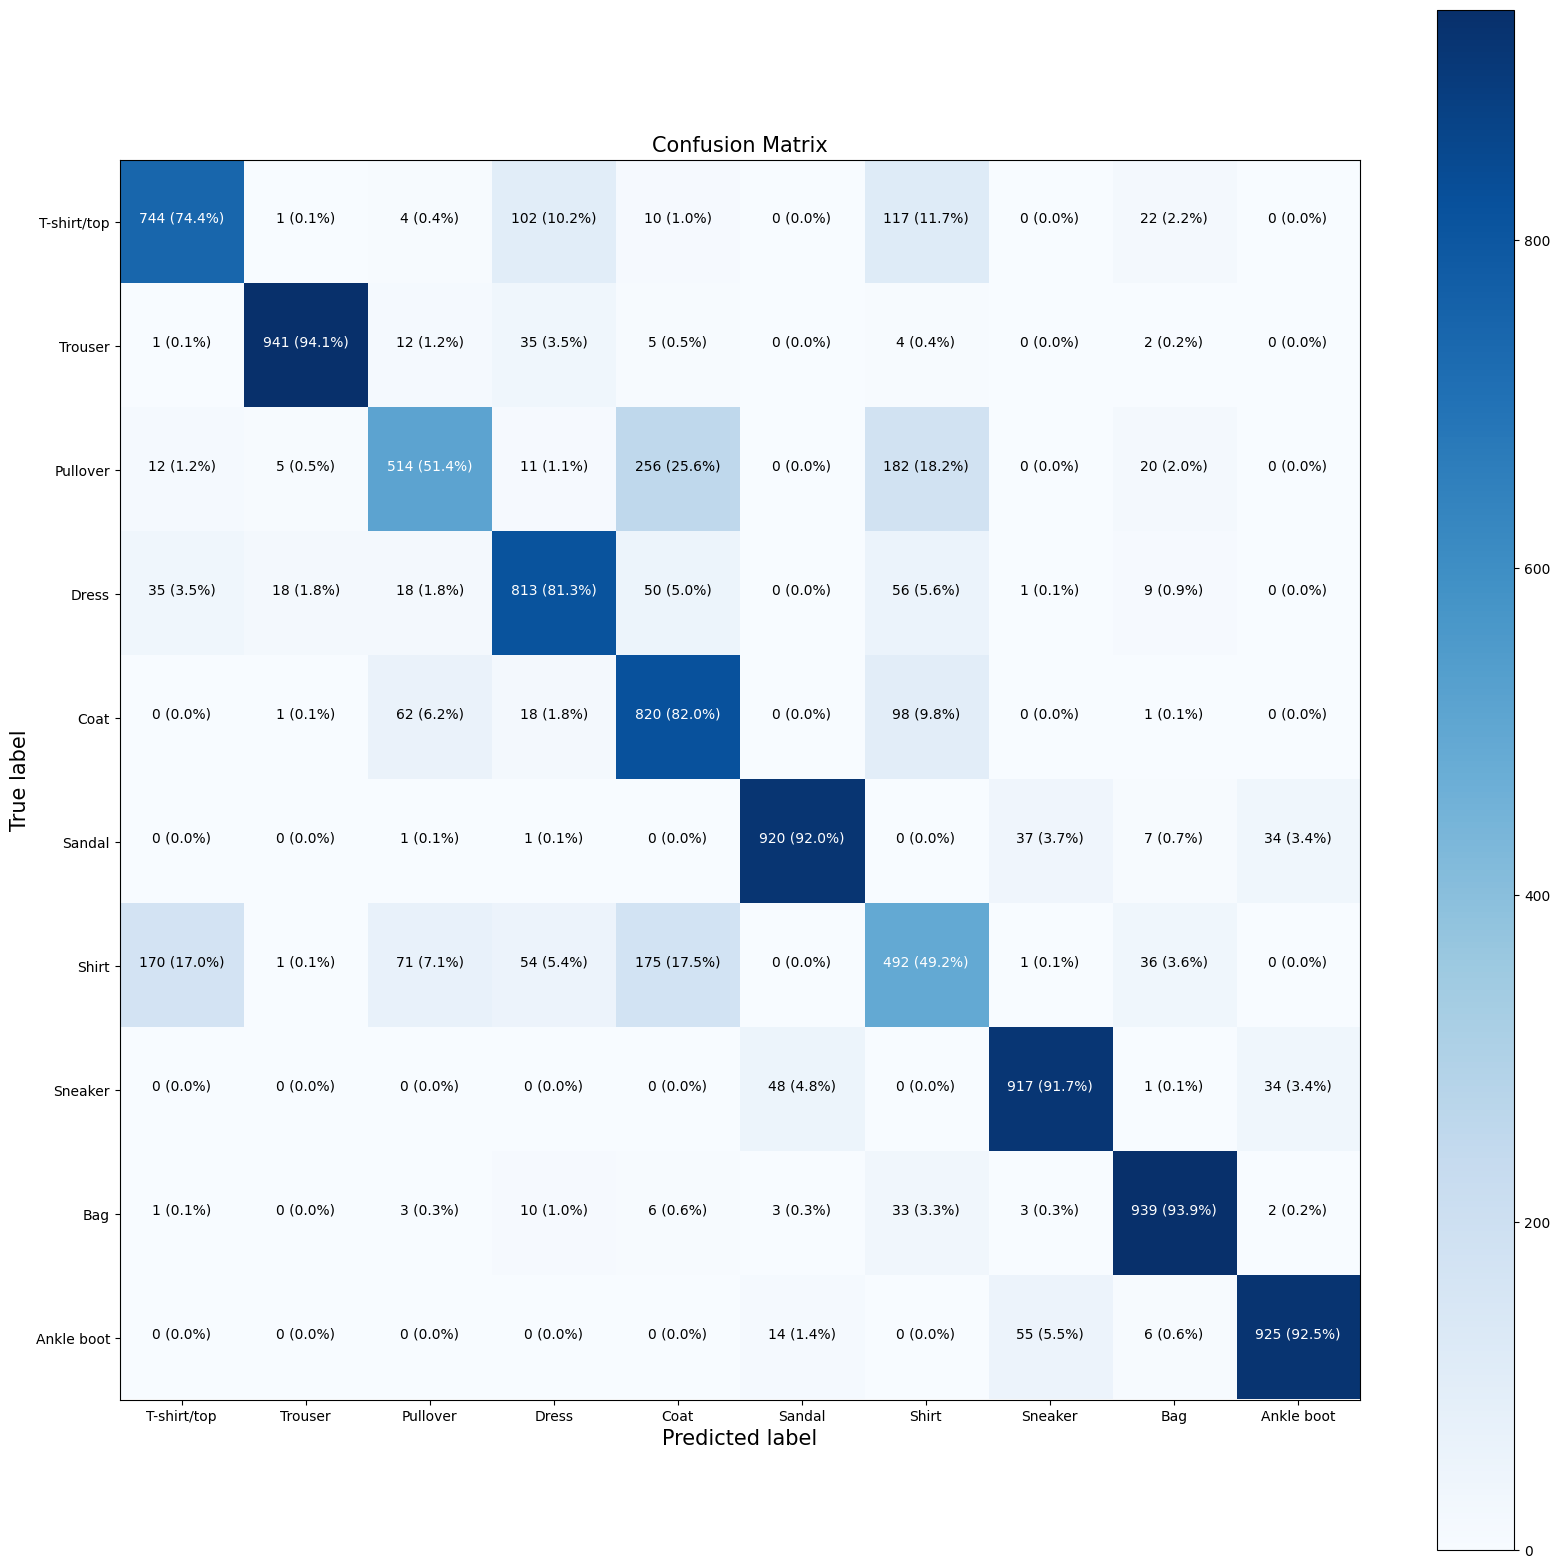

In [57]:
make_confusion_matrix(test_labels,
                      y_preds,
                      classes = class_names,
                      figsize = (20, 20),
                      text_size = 15)

In [68]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap = plt.cm.binary)

  # change of color of title based on right or wrong prediction
  if pred_label == true_label:
    color = 'green'
  else:
    color ='red'

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color = color)


1/1 [==============================] - 0s 21ms/step


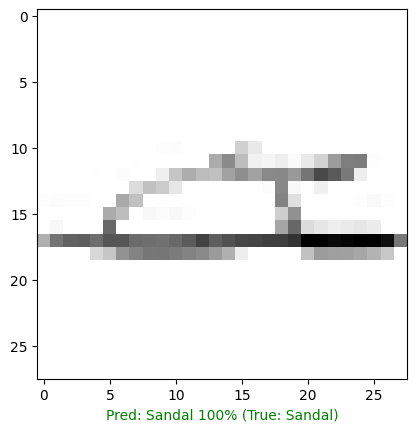

In [77]:
plot_random_image(model =model_4,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

## What patterns is our model learing?

In [73]:
model_4.layers

In [74]:
model_4.layers[1]

In [76]:
weights, biases = model_4.layers[1].get_weights()

weights, weights.shape

(array([[ 0.0761393 , -0.5506581 ,  0.04838443,  0.6389576 ],
        [ 0.34590012, -0.10035912,  0.4387006 ,  0.51646495],
        [-0.5634198 , -0.00466306,  0.27403468,  0.59970164],
        ...,
        [ 0.5336627 ,  0.16464663,  0.29568782, -0.77500194],
        [ 1.2680893 ,  0.30908117,  0.08542512, -0.31594145],
        [ 0.4044657 , -0.26943624, -0.10048641,  0.45070976]],
       dtype=float32),
 (784, 4))

In [79]:
#### Now let's check out biase
biases, biases.shape ## Intialized as 0s

(array([1.6776621, 1.6980225, 2.2085114, 1.9663862], dtype=float32), (4,))

In [80]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 4)                 3140      
                                                                 
 dense_28 (Dense)            (None, 4)                 20        
                                                                 
 dense_29 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


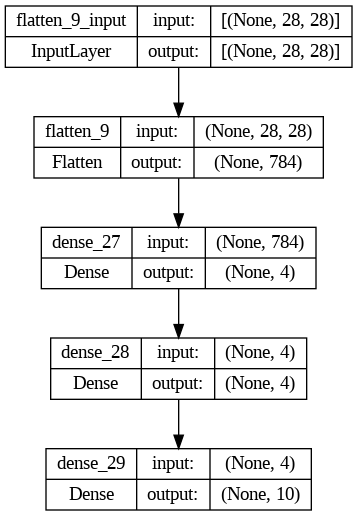

In [82]:
# plot our model
from tensorflow.keras.utils import plot_model

plot_model(model_4, show_shapes = True)